In [5]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [6]:
def build_mlp(column_count):
    inputs = keras.Input(shape=(column_count,))
    
    x = keras.layers.Dense(32)(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(0.3)(x)

    x = keras.layers.Dense(16)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(8)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.Dropout(0.2)(x)
    
    output = keras.layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs, output)

In [7]:

import joblib


df = pd.read_csv('TOI_2025.10.03_22.05.45.csv', comment='#')
cols_to_drop = [
    "rowid", "toi", "toipfx", "tid", "ctoi_alias", "pl_pnum",
    "rastr", "raerr1", "raerr2", "decstr", "dec", "decerr1", "decerr2",
    "st_pmralim", "st_pmrasymerr",
    "st_pmdeclim", "st_pmdecsymerr",
    "pl_tranmidlim", "pl_tranmidsymerr",
    "pl_orbperlim", "pl_orbpersymerr",
    "pl_trandurhlim", "pl_trandurhsymerr",
    "pl_trandeplim", "pl_trandepsymerr",
    "pl_radelim", "pl_radesymerr",
    "pl_insolerr1", "pl_insolerr2", "pl_insollim", "pl_insolsymerr",
    "pl_eqterr1", "pl_eqterr2", "pl_eqtlim", "pl_eqtsymerr",
    "st_tmaglim", "st_tmagsymerr",
    "st_distlim", "st_distsymerr",
    "st_tefflim", "st_teffsymerr",
    "st_logglim", "st_loggsymerr",
    "st_radlim", "st_radsymerr",
    "toi_created", "rowupdate"
]

df = df.drop(columns=cols_to_drop).reset_index(drop=True)

Y = df['tfopwg_disp'].map({'FP': 0, 'FA': 0, 'CP': 1, 'KP': 1})
X = df.drop(columns=['tfopwg_disp'])
X_filled = X.fillna(0)
X_encoded = pd.get_dummies(X_filled, drop_first=False).astype(np.float32)

mask = Y.notna()
X_encoded = X_encoded[mask]
Y = Y[mask].astype(np.float32)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded).astype(np.float32)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42, shuffle=True
)

In [9]:
model = build_mlp(X_encoded.shape[1])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy'
)
model.summary()

I0000 00:00:1759556188.424322  289690 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6631 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 39)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,065 (8.07 KB)

 Non-trainable params: 112 (448.00 B)

In [10]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

In [11]:
model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=1000,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/1000


2025-10-04 00:36:31.211092: I external/local_xla/xla/service/service.cc:163] XLA service 0x75dc04011a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-04 00:36:31.211140: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2025-10-04 00:36:31.265715: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-04 00:36:31.685720: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301


16/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6861 

I0000 00:00:1759556193.979674  290017 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - loss: 0.7030 - val_loss: 0.6310
Epoch 2/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6714 - val_loss: 0.6131
Epoch 3/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6581 - val_loss: 0.5955
Epoch 4/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6349 - val_loss: 0.5782
Epoch 5/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6140 - val_loss: 0.5571
Epoch 6/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6061 - val_loss: 0.5349
Epoch 7/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5778 - val_loss: 0.5144
Epoch 8/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5575 - val_loss: 0.4912
Epoch 9/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5391 - val_loss: 0.4734
Epoch 10/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5336 - val_loss: 0.4569
Epoch 11/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5096 - val_loss: 0.4422
Epoch 12/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [12]:
model.save('tess.keras')

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
                precision    recall  f1-score   support

FALSE POSITIVE       0.86      0.87      0.86       245
     CONFIRMED       0.88      0.87      0.87       268

      accuracy                           0.87       513
     macro avg       0.87      0.87      0.87       513
  weighted avg       0.87      0.87      0.87       513



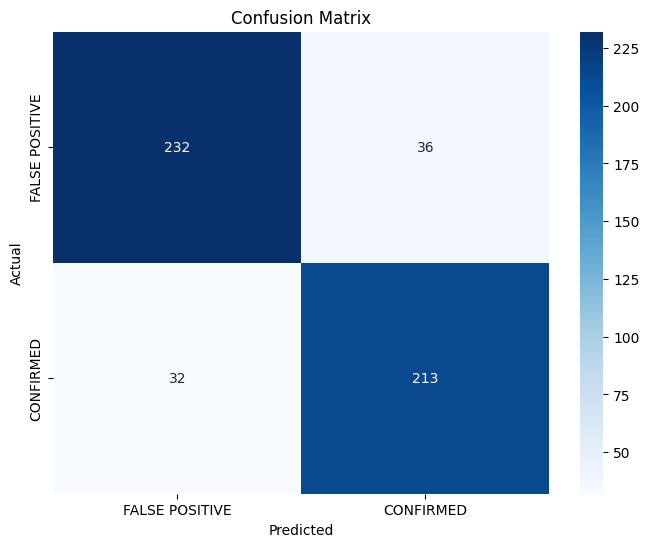

In [13]:
labels = ['FALSE POSITIVE', 'CONFIRMED']

Y_pred_probs = model.predict(X_test)
Y_pred = (Y_pred_probs >= 0.5).astype(int).flatten()
Y_true = Y_test.values.astype(int).flatten() 

Y_pred_strings = [labels[i] for i in Y_pred]
Y_true_strings = [labels[i] for i in Y_true]

cm = confusion_matrix(Y_true_strings, Y_pred_strings, labels=labels)
print(classification_report(Y_true_strings, Y_pred_strings, target_names=labels))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()